In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import torch
from neural_net import *
from train_net import *
from utils import *
from validate import *
from terminal_data import *


In [3]:
# Create and save a neural net
#network = train(nhiddenUnits = 256, epochs= 10000, batchsize = 1000, lr = 1e-3)

In [3]:
# Otherwise, just load a saved trained deep network
torchnet = torch.load("CostNet.pth")

Mean Squared Error during testing is 0.004529913887381554
......................................................................

 Plot of ddp.cost from plain crocoddyl and cost predicted by Neural Network


<Figure size 432x288 with 0 Axes>

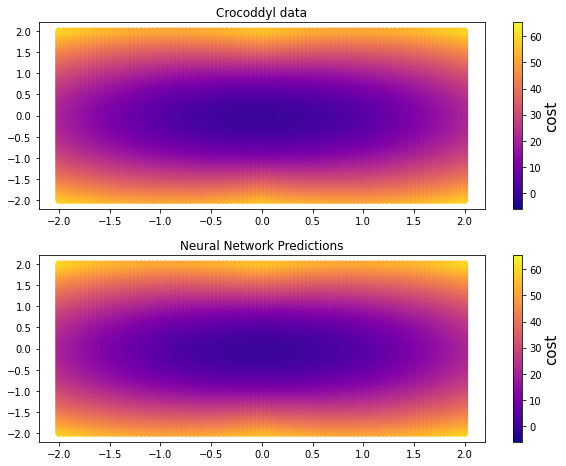

Plotting scatter of error between ddp.cost and cost predicted by Neural Net


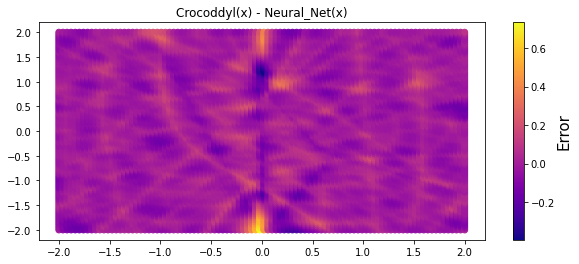

In [4]:
validate_and_plot(torchnet, plot_data=True, plot_error=True)

### Crocoddyl cost and iterations.



In [5]:
# Returns the cost, trajectory andcircular_crocoddylcoddylcoddylcoddylcoddylof pure crocoddyl 
costs_c, trajectories_c, iterations_c = circular_crocoddyl()

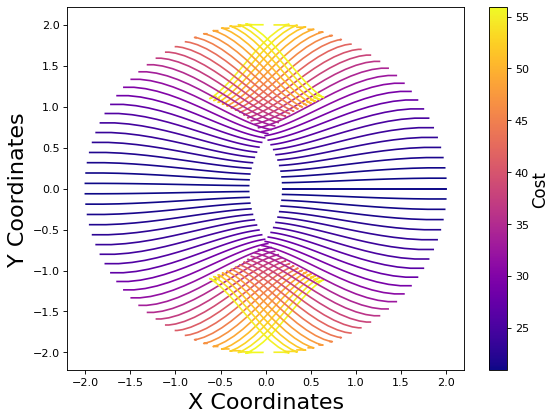

In [6]:
plot_trajectories(costs_c,trajectories_c,"Cost")

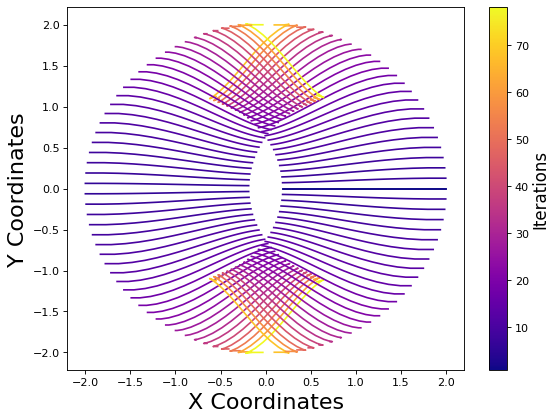

In [7]:
plot_trajectories(iterations_c,trajectories_c,"Iterations")

### Lets put the neural net inside crocoddyl and plot the results. 

In [8]:
# Returns the cost, trajectory and iterations when crocoddyl has terminal model with neural net inside it.
# Note that outliers have not been removed. 
costs, trajectories, iterations = circular_terminal_net(torchnet, remove_outliers = False)

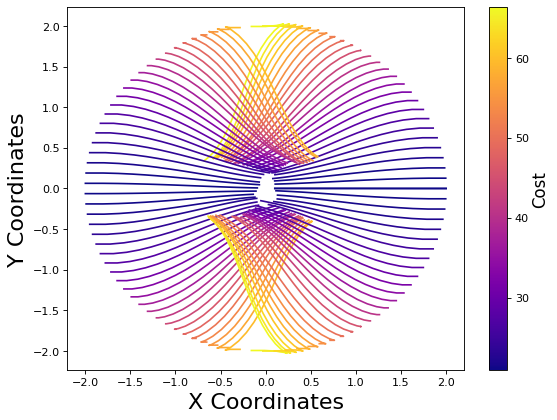

In [9]:
# Plotting trajectories colored according to cost
plot_trajectories(costs,trajectories,"Cost")

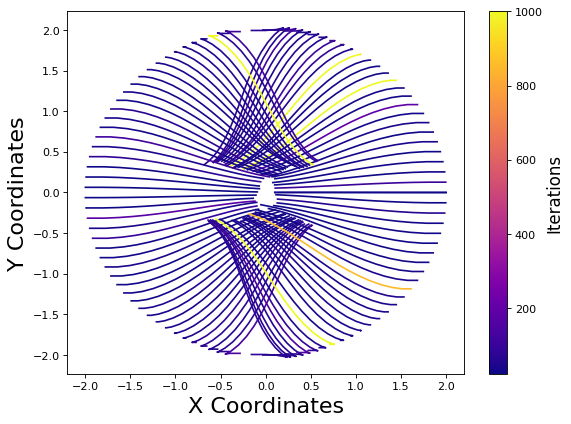

In [10]:
# Plotting trajectories colored according to iterations
plot_trajectories(iterations,trajectories,"Iterations")

### Let's remove the outliers and plot the results

In [11]:
c, t, i = circular_terminal_net(torchnet, remove_outliers = True)

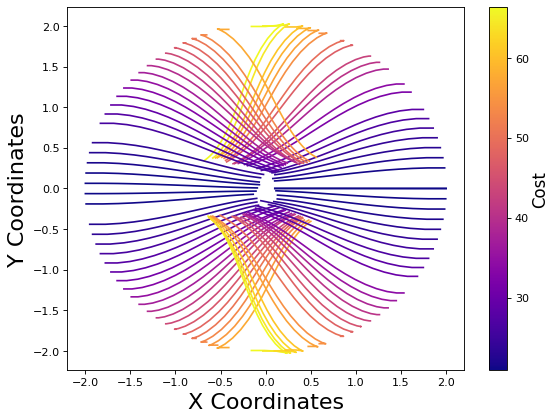

In [12]:
plot_trajectories(c,t,"Cost")

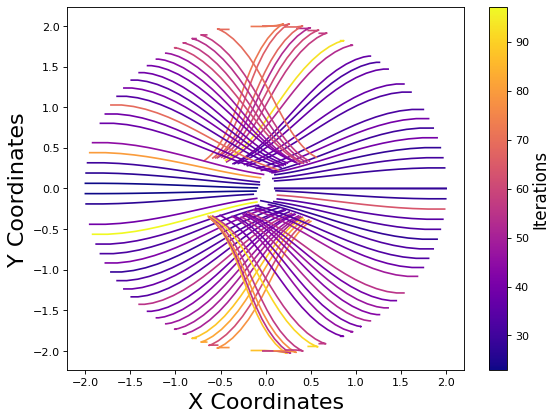

In [13]:
plot_trajectories(i,t,"Iterations")

### Scatter plot of error between crocoddyl and crocoddyl with terminal network.

<Figure size 480x320 with 0 Axes>

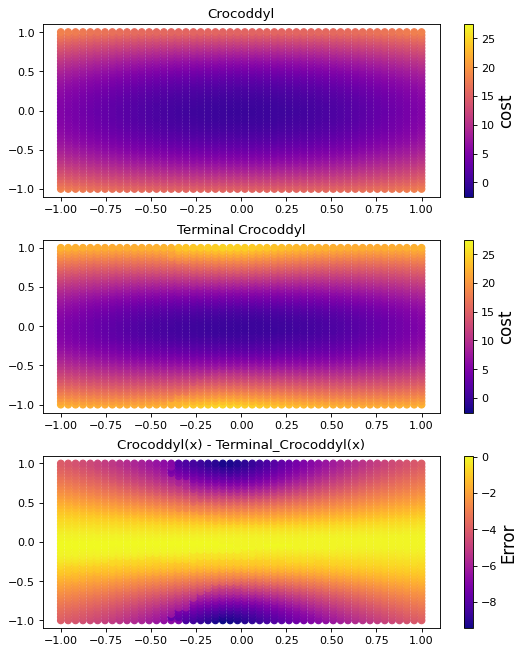

In [14]:
# Will take a long time to run
cost_net, iterations_net, cost, iterations = terminal_data(net = torchnet, size = 50)
plot_utils(cost, cost_net , 50, 'cost', True )
